In [2]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

df_P0_1k = pd.read_hdf("zwei_populationen.h5", key="P_0_1000")
df_P0_10k = pd.read_hdf("zwei_populationen.h5", key="P_0_10000")
df_P1 = pd.read_hdf("zwei_populationen.h5", key="P_1")

In [7]:
P0_1k = df_P0_10k.values
P0_10k = df_P0_1k.values
P1 = df_P1.values

muP0 = np.array([np.mean(P0_10k, axis=0)])
muP0 = np.transpose(muP0) # Now it is a proper column vector
print('muP0 =', muP0)
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)
print('muP1 =', muP1)

muP0 = [[-0.09576791]
 [ 2.8788468 ]]
muP1 = [[ 5.98644821]
 [ 3.0852829 ]]


In [10]:
covP0 = np.size(P0_10k)*np.cov(P0_10k, ddof = 0, rowvar=False)
print('Streumatrix der ersten Pop =', covP0)
covP1 = np.size(P1)*np.cov(P1, ddof = 0, rowvar=False)
print('Streumatrix der zweiten Pop =', covP1)
# is this the combined covariance matrix
Sw = covP0 + covP1
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True)
print(V)
w = V[:,0] # get first column
wstrich = np.dot(SwInv, muP0-muP1)
print(wstrich)
print(w)

Streumatrix der ersten Pop = [[ 24447.7728588   16304.6766634 ]
 [ 16304.6766634   13502.86377453]]
Streumatrix der zweiten Pop = [[ 247019.0030075   148200.30134058]
 [ 148200.30134058  109535.34588752]]
[[ 0.60323736 -0.0339214 ]
 [-0.79756172  0.9994245 ]]
[[-0.0001127]
 [ 0.000149 ]]
[ 0.60323736 -0.79756172]


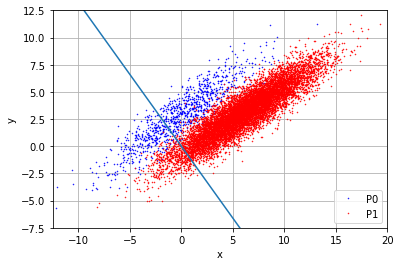

In [17]:
x0, y0 = zip(*P0_10k)
x1, y1 = zip(*P1)
linspace = np.linspace(-20,20,100)
plt.plot(x0, y0, 'b.', label='P_0', markersize=1)
plt.plot(x1, y1, 'r.', label='P_1', markersize=1)
plt.plot(linspace, w[1]/w[0]*linspace)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-12.5,20,-7.5,12.5])
plt.show()

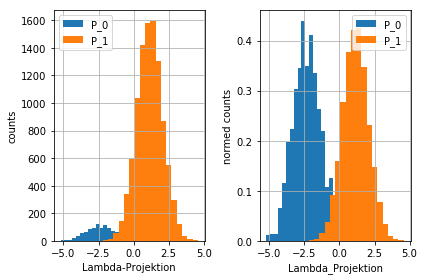

In [90]:
plt.clf()
projectionsP0 = np.dot(P0_10k, w)
projectionsP1 = np.dot(P1, w)
plt.subplot(1,2,1)
plt.hist(projectionsP0, label='P_0', bins=20)
plt.hist(projectionsP1, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda-Projektion')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(projectionsP0, normed=True, label='P_0', bins=20)
plt.hist(projectionsP1, normed=True, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda_Projektion')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()

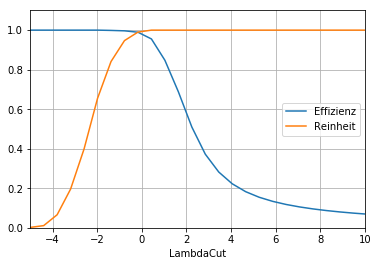

In [94]:
plt.clf()
signal = projectionsP0
untergrund = projectionsP1
truePos = 0 # We store the true positives per cut in this array
falsePos = 0
falseNeg = 0
truePosArray = [] # We append each truePos to this array to find
signalDetected = 0
# the dependence of the true positives on the cut 
falsePosArray = [] # We choose a list because np arrays have a fixed size as far as we know
falseNegArray = []
signalDetectedArray = [] # ICH WEIS NICHT OB MAN SO DIESES S/B UND DIE SIGNIFIKANZ BERECHNET: NACHFRAGEN!!!!!!!!!!!!!!!!!
for lambdaCut in np.linspace(-5,12.5,30):
    truePos = 0
    falsePos = 0
    falseNeg = 0
    signalDetected = 0
    for i in range(0,1000): # Count through the signal and background
        if signal[i] <= lambdaCut:
            truePos += 1
            signalDetected += 1
        else:
            falseNeg += 1
    for i in range(0,10000):
        if untergrund[i] <= lambdaCut:
            falsePos += 1
            signalDetected += 1
    truePosArray.append(truePos)
    falsePosArray.append(falsePos)
    falseNegArray.append(falseNeg)
    signalDetectedArray.append(signalDetected)

truePosArray = np.asarray(truePosArray)
falsePosArray = np.asarray(falsePosArray)
falseNegArray = np.asarray(falseNegArray)
signalDetectedArray = np.asarray(signalDetectedArray)

efficiency = (truePosArray)/(truePosArray+falsePosArray) # Effizienz
purity = (truePosArray)/(truePosArray+falseNegArray) # Reinheit

lambdaCut = np.linspace(-5,12.5,30)
plt.plot(lambdaCut, precision, label='Effizienz')
plt.plot(lambdaCut, purity, label='Reinheit')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()

C:\Users\jlspa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


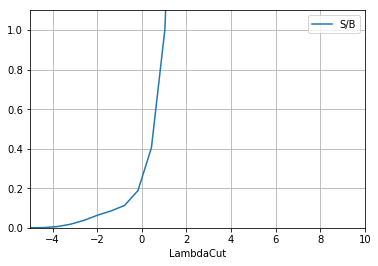

In [95]:
#SDurchB = signalDetectedArray/(11000-signalDetectedArray)
Signifikanz = signalDetectedArray()
plt.plot(lambdaCut, SDurchB, label='S/B')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()